## Importing the libraries

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn


import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow_addons.metrics import RSquare
import xgboost as xgb
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor


from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
import joblib

2024-01-23 09:49:00.081407: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-23 09:49:00.109475: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-23 09:49:00.110987: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-23 09:49:00.694799: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/home/hamid/anaconda3/envs/ml-mansori/lib/python3.8/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in Ma

## Load and Prepare Data

In [2]:
# Load data
data = pd.read_csv("country_vaccinations.csv")

## EDA

In [3]:
data.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/


In [4]:
data.sample(5)

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
12079,Honduras,HND,2021-03-05,NaN,NaN,NaN,NaN,276.0,NaN,NaN,NaN,28.0,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ...",World Health Organization,http://www.salud.gob.hn/site/index.php/compone...
14335,Japan,JPN,2021-03-23,699126.0,667370.0,31756.0,46428.0,48562.0,0.55,0.53,0.03,384.0,"Moderna, Pfizer/BioNTech",Prime Minister's Office,https://www.kantei.go.jp/jp/headline/kansensho...
1871,Azerbaijan,AZE,2021-03-12,443888.0,443888.0,NaN,7039.0,11692.0,4.38,4.38,NaN,1153.0,"Oxford/AstraZeneca, Sinovac, Sputnik V",Government of Azerbaijan,https://koronavirusinfo.az
28735,Tunisia,TUN,2021-06-19,1551849.0,1147282.0,404567.0,33954.0,29137.0,13.13,9.71,3.42,2465.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, ...",Ministry of Health,https://www.facebook.com/santetunisie.rns.tn/p...
26935,Spain,ESP,2021-06-26,NaN,NaN,NaN,NaN,500441.0,NaN,NaN,NaN,10704.0,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ...",Ministry of Health,https://www.mscbs.gob.es/profesionales/saludPu...


In [5]:
# Find  the number of country
data["iso_code"].nunique()

218

In [6]:
# Find the number of vaccines
data["vaccines"].nunique()

53

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31240 entries, 0 to 31239
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              31240 non-null  object 
 1   iso_code                             31240 non-null  object 
 2   date                                 31240 non-null  object 
 3   total_vaccinations                   17451 non-null  float64
 4   people_vaccinated                    16554 non-null  float64
 5   people_fully_vaccinated              13795 non-null  float64
 6   daily_vaccinations_raw               14421 non-null  float64
 7   daily_vaccinations                   30948 non-null  float64
 8   total_vaccinations_per_hundred       17451 non-null  float64
 9   people_vaccinated_per_hundred        16554 non-null  float64
 10  people_fully_vaccinated_per_hundred  13795 non-null  float64
 11  daily_vaccinations_per_milli

In [8]:
data.tail()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
31235,Zimbabwe,ZWE,2021-07-11,1491397.0,895980.0,595417.0,NaN,18598.0,10.03,6.03,4.01,1251.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1415771723...
31236,Zimbabwe,ZWE,2021-07-12,1531868.0,926312.0,605556.0,40471.0,23205.0,10.31,6.23,4.07,1561.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1415771723...
31237,Zimbabwe,ZWE,2021-07-13,1575539.0,955656.0,619883.0,43671.0,27567.0,10.60,6.43,4.17,1855.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1415771723...
31238,Zimbabwe,ZWE,2021-07-14,1613640.0,988746.0,624894.0,38101.0,30698.0,10.86,6.65,4.20,2065.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1415771723...
31239,Zimbabwe,ZWE,2021-07-15,1666862.0,1036252.0,630610.0,53222.0,33326.0,11.21,6.97,4.24,2242.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1415771723...


In [9]:
data.shape

(31240, 15)

In [10]:
data.describe()

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
count,1.745100e+04,1.655400e+04,1.379500e+04,1.442100e+04,3.094800e+04,17451.000000,16554.000000,13795.000000,30948.000000
mean,1.200444e+07,5.704551e+06,3.293973e+06,2.273661e+05,1.149718e+05,29.283554,19.181574,12.340698,3426.365969
std,6.622349e+07,2.101612e+07,1.234425e+07,1.258556e+06,8.460548e+05,35.042304,20.734193,15.857682,4572.377684
min,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1.262015e+05,9.999100e+04,4.832450e+04,4.324000e+03,8.520000e+02,2.970000,2.580000,1.320000,412.000000
50%,8.890780e+05,6.450395e+05,3.632100e+05,2.133600e+04,6.471000e+03,14.510000,10.730000,5.560000,1851.000000
75%,4.213660e+06,2.809300e+06,1.635366e+06,9.441700e+04,3.545425e+04,44.460000,30.890000,17.610000,5123.000000
max,1.426347e+09,6.220000e+08,2.232990e+08,2.474100e+07,2.242429e+07,232.350000,116.660000,115.690000,118759.000000


In [11]:
data.isna().sum()

country                                    0
iso_code                                   0
date                                       0
total_vaccinations                     13789
people_vaccinated                      14686
people_fully_vaccinated                17445
daily_vaccinations_raw                 16819
daily_vaccinations                       292
total_vaccinations_per_hundred         13789
people_vaccinated_per_hundred          14686
people_fully_vaccinated_per_hundred    17445
daily_vaccinations_per_million           292
vaccines                                   0
source_name                                0
source_website                             0
dtype: int64

In [12]:
data.dtypes

country                                 object
iso_code                                object
date                                    object
total_vaccinations                     float64
people_vaccinated                      float64
people_fully_vaccinated                float64
daily_vaccinations_raw                 float64
daily_vaccinations                     float64
total_vaccinations_per_hundred         float64
people_vaccinated_per_hundred          float64
people_fully_vaccinated_per_hundred    float64
daily_vaccinations_per_million         float64
vaccines                                object
source_name                             object
source_website                          object
dtype: object

In [13]:
# Convert to datetime form
data["date"] = pd.to_datetime(data.date)
data.dtypes

country                                        object
iso_code                                       object
date                                   datetime64[ns]
total_vaccinations                            float64
people_vaccinated                             float64
people_fully_vaccinated                       float64
daily_vaccinations_raw                        float64
daily_vaccinations                            float64
total_vaccinations_per_hundred                float64
people_vaccinated_per_hundred                 float64
people_fully_vaccinated_per_hundred           float64
daily_vaccinations_per_million                float64
vaccines                                       object
source_name                                    object
source_website                                 object
dtype: object

In [14]:
# Grouping by vaccine and total vaccination to find more used vaccines
df_vaccines_total_vaccinations = data.groupby(["vaccines"])["total_vaccinations"].max().reset_index().sort_values("total_vaccinations", ascending=False)
df_vaccines_total_vaccinations.head()

,vaccines,total_vaccinations
4,"CanSino, Sinopharm/Beijing, Sinopharm/Wuhan, S...",1.426347e+09
9,"Covaxin, Oxford/AstraZeneca, Sputnik V",3.913405e+08
16,"Johnson&Johnson, Moderna, Pfizer/BioNTech",3.360550e+08
18,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",1.208730e+08
12,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ...",8.498985e+07


<Axes: xlabel='total_vaccinations', ylabel='vaccines'>

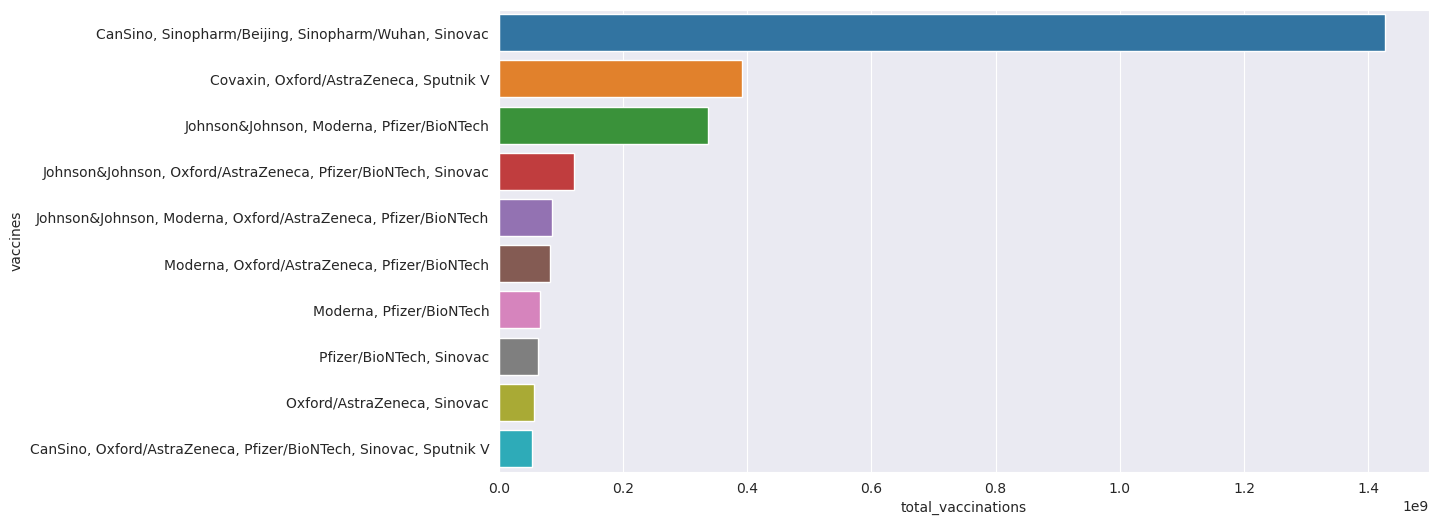

In [15]:
# Visualization for most used vaccines
plt.figure(figsize=(12, 6))
sns.set_style("darkgrid")
sns.barplot(data=df_vaccines_total_vaccinations.head(10), x="total_vaccinations", y="vaccines")

<Axes: xlabel='total_vaccinations', ylabel='vaccines'>

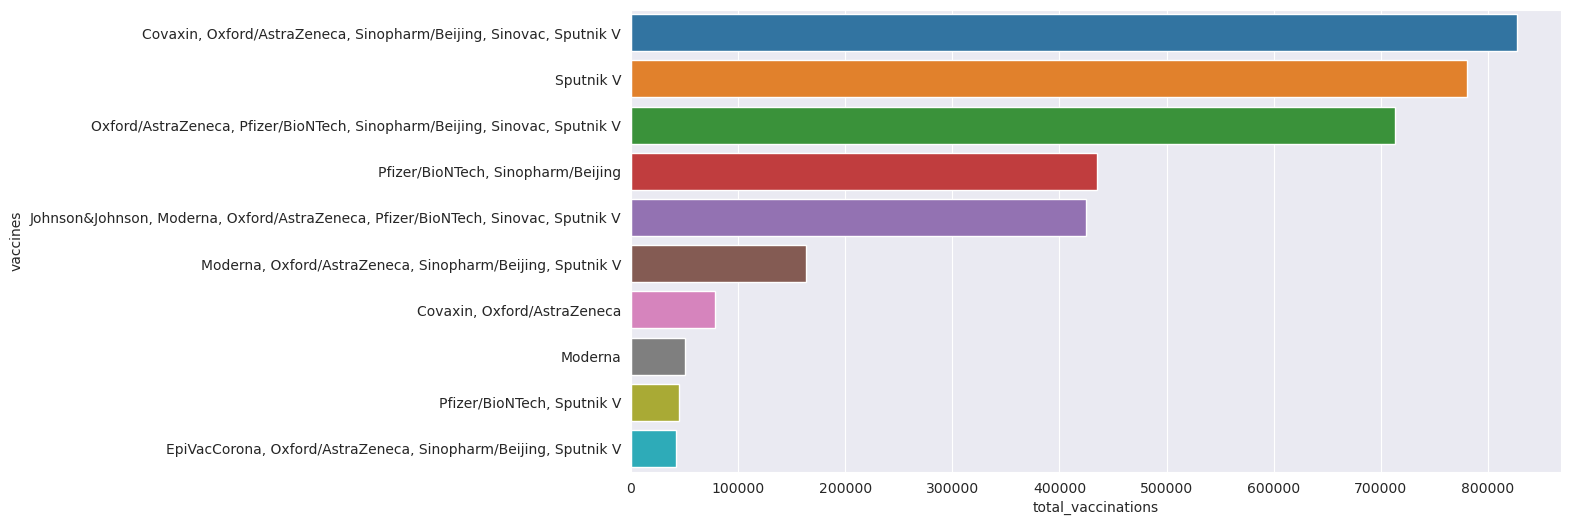

In [16]:
# Visualization for the least used vaccine
plt.figure(figsize=(12, 6))
sns.set_style("darkgrid")
sns.barplot(data=df_vaccines_total_vaccinations.tail(10), x="total_vaccinations", y="vaccines")

In [17]:
# The The percentage of vaccines used in the vaccination of countries
df_vaccines_total_vaccinations["Percent use vaccines"] = (df_vaccines_total_vaccinations["total_vaccinations"] / df_vaccines_total_vaccinations["total_vaccinations"].sum()) * 100
df_vaccines_total_vaccinations.head()

,vaccines,total_vaccinations,Percent use vaccines
4,"CanSino, Sinopharm/Beijing, Sinopharm/Wuhan, S...",1.426347e+09,47.292614
9,"Covaxin, Oxford/AstraZeneca, Sputnik V",3.913405e+08,12.975465
16,"Johnson&Johnson, Moderna, Pfizer/BioNTech",3.360550e+08,11.142392
18,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",1.208730e+08,4.007721
12,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ...",8.498985e+07,2.817962


<Axes: xlabel='Percent use vaccines', ylabel='vaccines'>

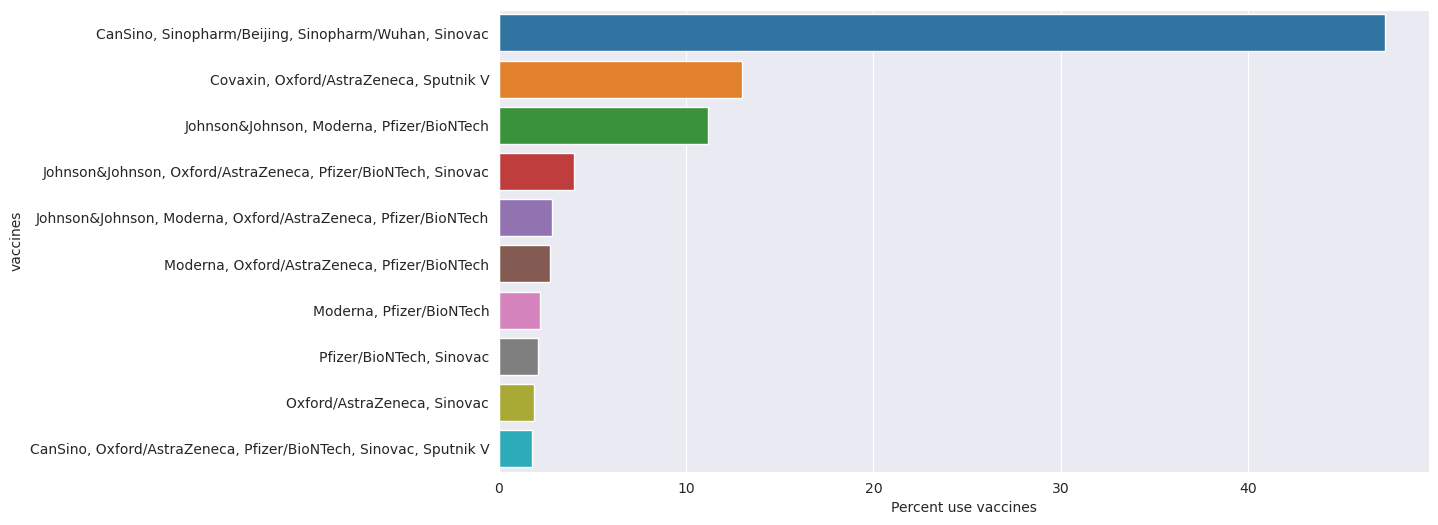

In [18]:
# Visualization the most percentage of vaccines used in the vaccination of countries
plt.figure(figsize=(12, 6))
sns.set_style("darkgrid")
sns.barplot(data=df_vaccines_total_vaccinations.head(10), x="Percent use vaccines", y="vaccines")

<Axes: xlabel='Percent use vaccines', ylabel='vaccines'>

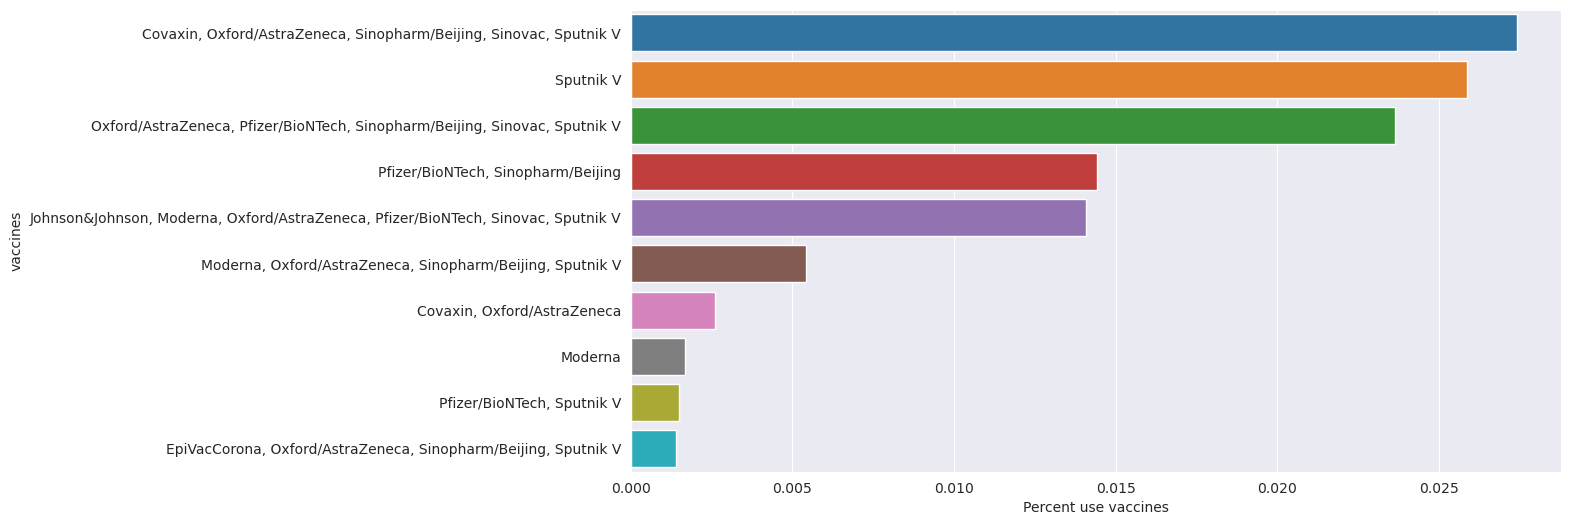

In [19]:
# # Visualization the most percentage of vaccines used in the vaccination of countries
plt.figure(figsize=(12, 6))
sns.set_style("darkgrid")
sns.barplot(data=df_vaccines_total_vaccinations.tail(10), x="Percent use vaccines", y="vaccines")

In [20]:
# Grouping countries by total vaccination
df_vaccinations_in_country = data.groupby(["country"])["total_vaccinations",].max().reset_index().sort_values("total_vaccinations",
                                                                                                               ascending=False)

In [21]:
df_vaccinations_in_country

,country,total_vaccinations
40,China,1.426347e+09
89,India,3.913405e+08
207,United States,3.360550e+08
27,Brazil,1.208730e+08
74,Germany,8.498985e+07
...,...,...
202,Tuvalu,4.772000e+03
66,Falkland Islands,4.407000e+03
129,Montserrat,2.695000e+03
142,Niue,1.216000e+03


<Axes: xlabel='total_vaccinations', ylabel='country'>

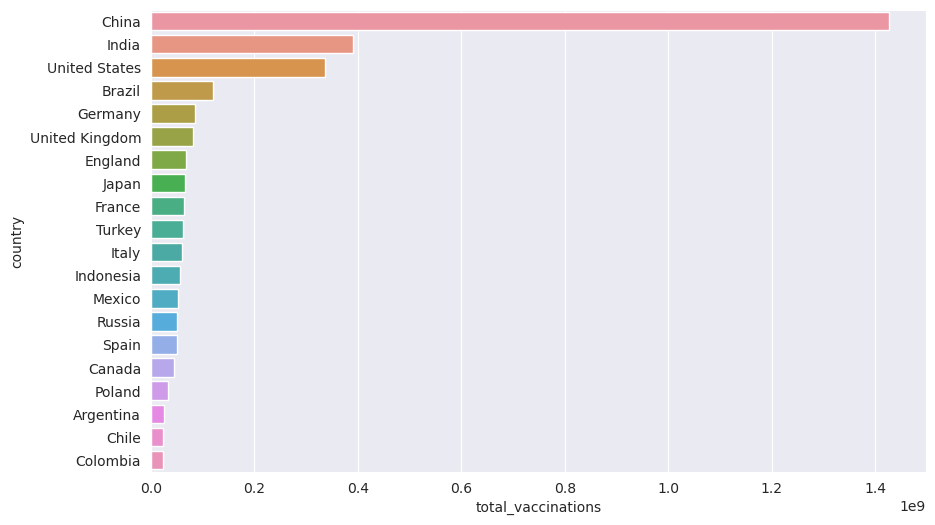

In [22]:
# Visualization of countries with the highest total vaccination 
plt.figure(figsize=(10, 6))
sns.set_style("darkgrid")
sns.barplot(data=df_vaccinations_in_country.head(20), x="total_vaccinations", y="country")

<Axes: xlabel='total_vaccinations', ylabel='country'>

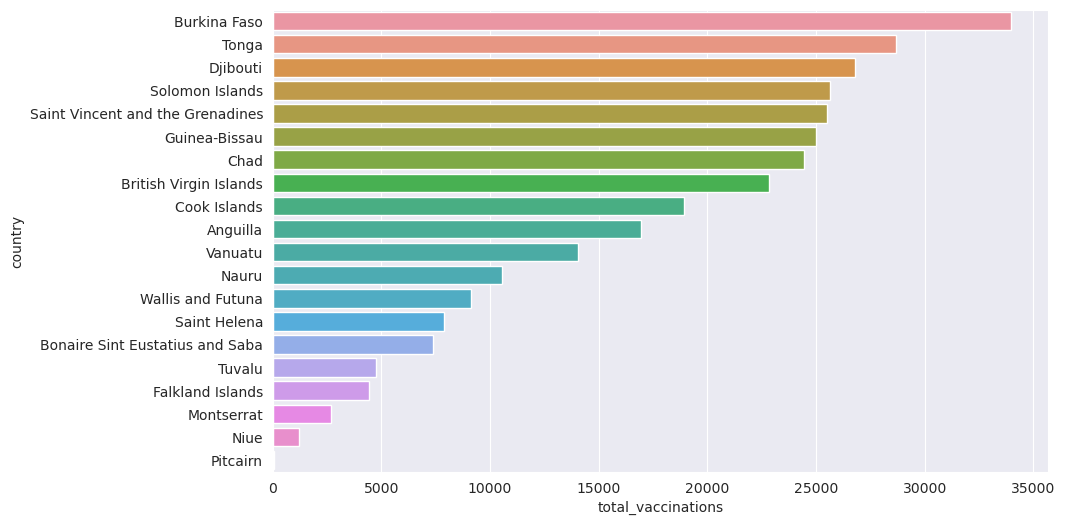

In [23]:
# Visualization of countries with the lowest vaccination rates
plt.figure(figsize=(10, 6))
sns.set_style("darkgrid")
sns.barplot(data=df_vaccinations_in_country.tail(20), x="total_vaccinations", y="country")

<Axes: xlabel='Date Vaccination', ylabel='total_vaccinations_per_hundred'>

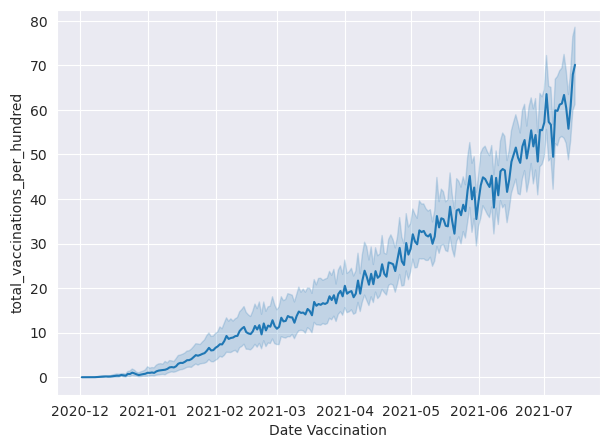

In [24]:
# Vaccination percentage by time
plt.figure(figsize=(7, 5))
plt.xlabel("Date Vaccination")
sns.lineplot(data=data, x="date", y="total_vaccinations_per_hundred")

In [25]:
# Grouping countries by total_vaccinations_per_hundred, people_vaccinated_per_hundred, people_fully_vaccinated_per_hundred
df1 = data.groupby("country")["total_vaccinations_per_hundred",
                                              "people_vaccinated_per_hundred",
                                              "people_fully_vaccinated_per_hundred"].max().reset_index()

/tmp/ipykernel_3177/796586219.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df1 = data.groupby("country")["total_vaccinations_per_hundred",


In [26]:
df1.head(10)

,country,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred
0,Afghanistan,2.63,1.98,0.56
1,Albania,36.56,20.74,15.82
2,Algeria,5.70,5.70,NaN
3,Andorra,88.43,53.99,34.44
4,Angola,4.74,2.92,1.83
5,Anguilla,112.99,62.13,50.86
6,Antigua and Barbuda,67.15,37.88,29.27
7,Argentina,57.83,46.43,11.39
8,Armenia,8.80,6.44,2.36
9,Aruba,125.25,66.52,58.73


<Axes: xlabel='total_vaccinations_per_hundred', ylabel='country'>

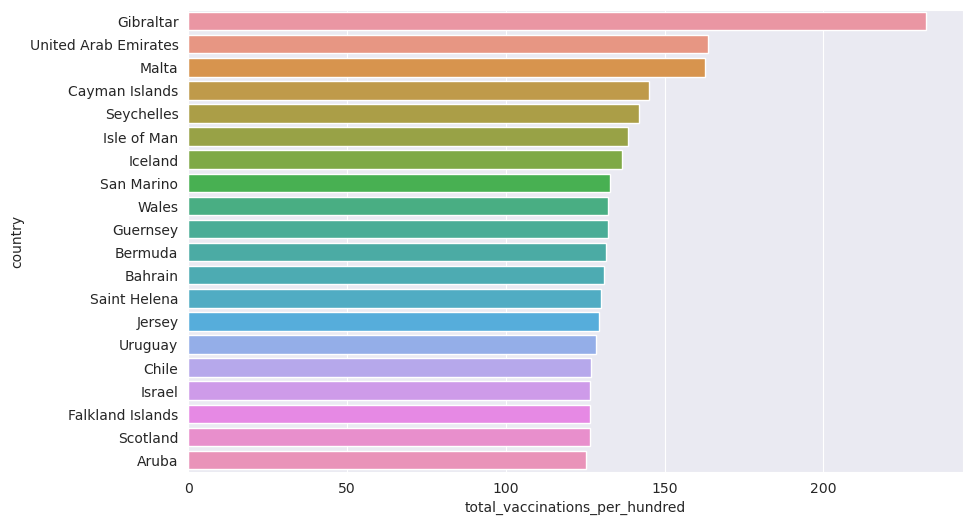

In [27]:
# Total vaccination percentage of countries
plt.figure(figsize=(10, 6))
sns.set_style("darkgrid")
sns.barplot(data=df1.sort_values("total_vaccinations_per_hundred", ascending=False).head(20), y="country", x="total_vaccinations_per_hundred")

<Axes: xlabel='people_vaccinated_per_hundred', ylabel='country'>

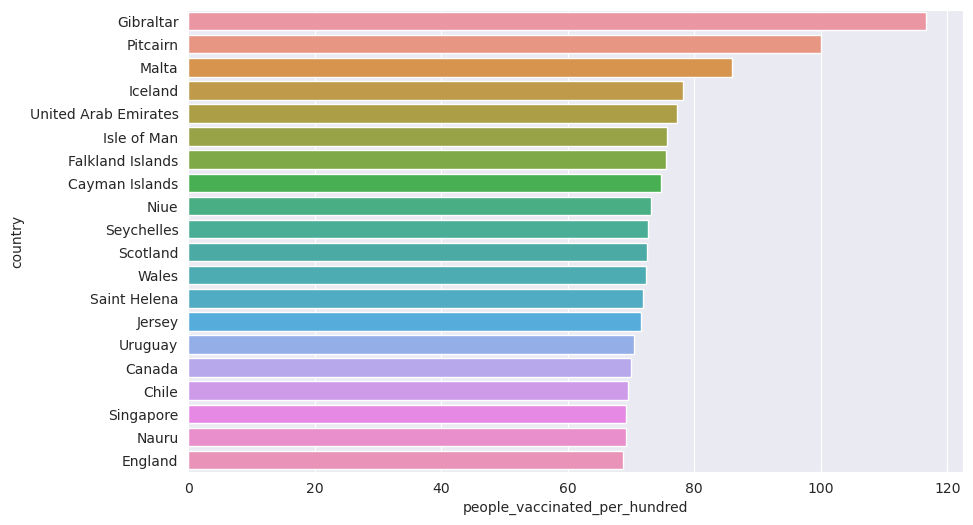

In [28]:
# people_vaccinated_per_hundred percentage of countries
plt.figure(figsize=(10, 6))
sns.set_style("darkgrid")
sns.barplot(data=df1.sort_values("people_vaccinated_per_hundred", ascending=False).head(20), y="country", x="people_vaccinated_per_hundred")

<Axes: xlabel='people_fully_vaccinated_per_hundred', ylabel='country'>

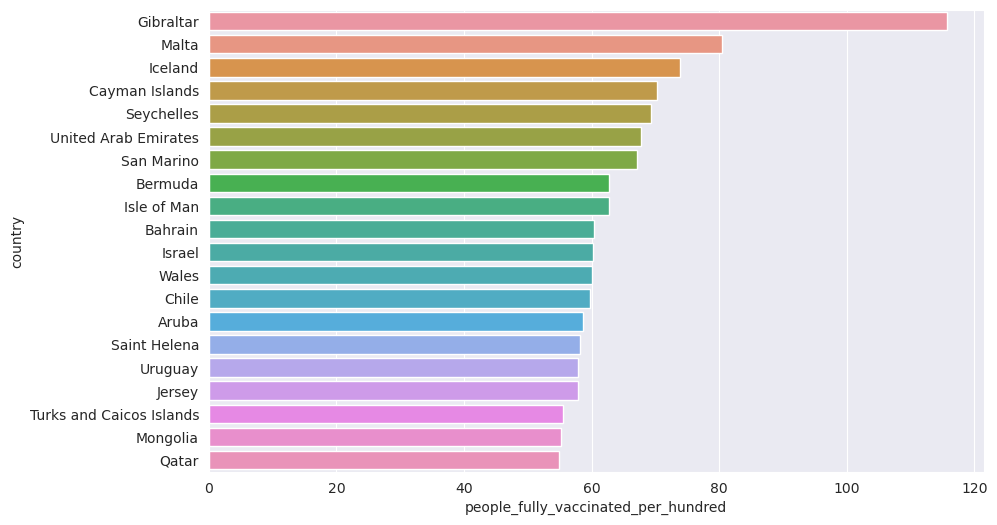

In [29]:
# people_fully_vaccinated_per_hundred percentage of countries
plt.figure(figsize=(10, 6))
sns.set_style("darkgrid")
sns.barplot(data=df1.sort_values("people_fully_vaccinated_per_hundred", ascending=False).head(20), y="country", x="people_fully_vaccinated_per_hundred")

/tmp/ipykernel_3177/1851235031.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


<Axes: >

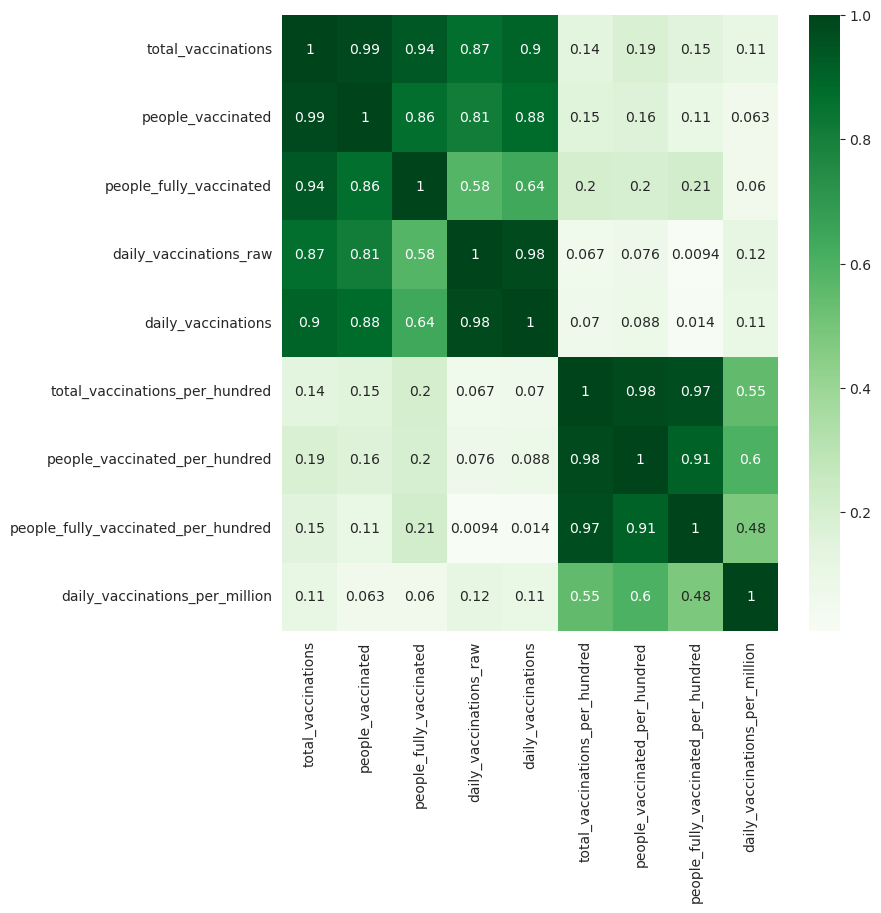

In [30]:
# Heatmap to find correlation between features
plt.figure(figsize=(8, 8))
corr = data.corr()
sns.heatmap(data=corr, cmap="Greens", annot=True)

<Axes: xlabel='date', ylabel='total_vaccinations'>

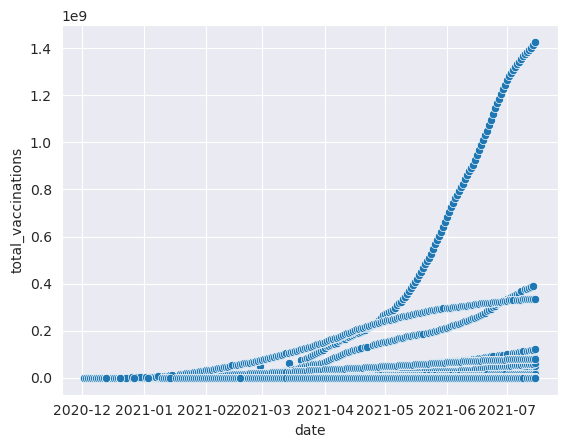

In [31]:
# Vaccination process by time
sns.scatterplot(data=data, x=data.date, y=data.total_vaccinations)

## Data Preprocessing

In [32]:
data.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/


In [33]:
# Delete unimportant columns
data.drop(["vaccines", "source_name", "source_website"], axis=1, inplace=True)

In [34]:
df = data.copy()

In [35]:
# Delete unimportant columns
df = df.drop(["iso_code"], axis=1)

In [36]:
# Converting the date column to three year month day columns
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year
df = df.drop(["date"], axis=1)

In [37]:
df = pd.get_dummies(df,columns=["country"])

In [38]:
df.dropna(inplace=True)

In [39]:
df.isnull().sum()

total_vaccinations           0
people_vaccinated            0
people_fully_vaccinated      0
daily_vaccinations_raw       0
daily_vaccinations           0
                            ..
country_Wales                0
country_Wallis and Futuna    0
country_Yemen                0
country_Zambia               0
country_Zimbabwe             0
Length: 230, dtype: int64

Now, we want to find outliers

In [40]:
df

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,day,...,country_Uruguay,country_Uzbekistan,country_Vanuatu,country_Venezuela,country_Vietnam,country_Wales,country_Wallis and Futuna,country_Yemen,country_Zambia,country_Zimbabwe
94,593313.0,479574.0,113739.0,2859.0,6487.0,1.52,1.23,0.29,167.0,27,...,0,0,0,0,0,0,0,0,0,0
101,630305.0,481800.0,148505.0,4015.0,5285.0,1.62,1.24,0.38,136.0,3,...,0,0,0,0,0,0,0,0,0,0
182,3049.0,2438.0,611.0,1348.0,254.0,0.11,0.08,0.02,88.0,18,...,0,0,0,0,0,0,0,0,0,0
264,622507.0,440921.0,181586.0,9548.0,12160.0,21.63,15.32,6.31,4225.0,11,...,0,0,0,0,0,0,0,0,0,0
265,632676.0,444755.0,187921.0,10169.0,10870.0,21.98,15.45,6.53,3777.0,12,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31233,1464065.0,875182.0,588883.0,30487.0,15907.0,9.85,5.89,3.96,1070.0,9,...,0,0,0,0,0,0,0,0,0,1
31236,1531868.0,926312.0,605556.0,40471.0,23205.0,10.31,6.23,4.07,1561.0,12,...,0,0,0,0,0,0,0,0,0,1
31237,1575539.0,955656.0,619883.0,43671.0,27567.0,10.60,6.43,4.17,1855.0,13,...,0,0,0,0,0,0,0,0,0,1
31238,1613640.0,988746.0,624894.0,38101.0,30698.0,10.86,6.65,4.20,2065.0,14,...,0,0,0,0,0,0,0,0,0,1


In [41]:
df.dtypes

total_vaccinations           float64
people_vaccinated            float64
people_fully_vaccinated      float64
daily_vaccinations_raw       float64
daily_vaccinations           float64
                              ...   
country_Wales                  uint8
country_Wallis and Futuna      uint8
country_Yemen                  uint8
country_Zambia                 uint8
country_Zimbabwe               uint8
Length: 230, dtype: object

## Strorytelling - Visualization

<Axes: xlabel='month', ylabel='daily_vaccinations_raw'>

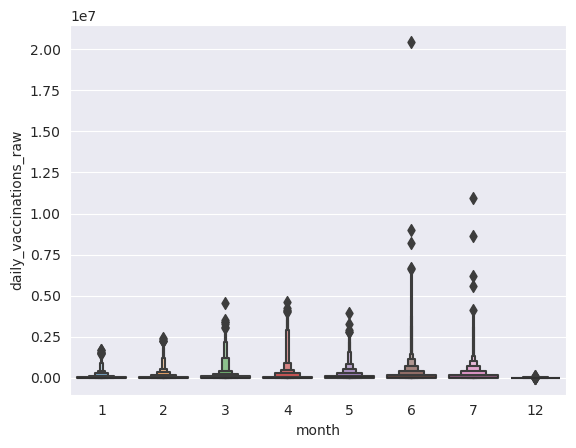

In [42]:
sns.boxenplot(data=df, x=df.month, y=df.daily_vaccinations_raw)

<Axes: xlabel='month', ylabel='total_vaccinations'>

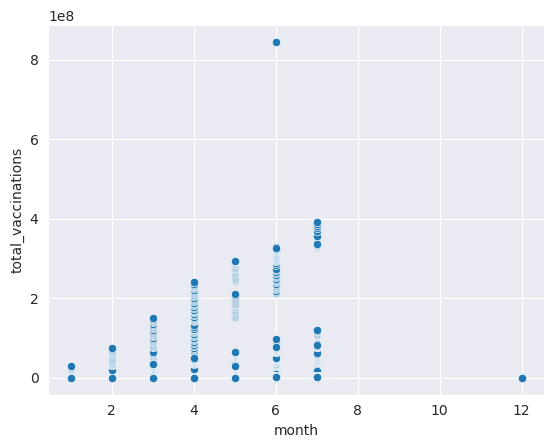

In [43]:
sns.scatterplot(data=df, x=df.month, y=df.total_vaccinations)

In [44]:
outlier_value = df.total_vaccinations.max()

# remove outlier value in label column
df = df[df['total_vaccinations'] != outlier_value]

<Axes: xlabel='month', ylabel='daily_vaccinations_raw'>

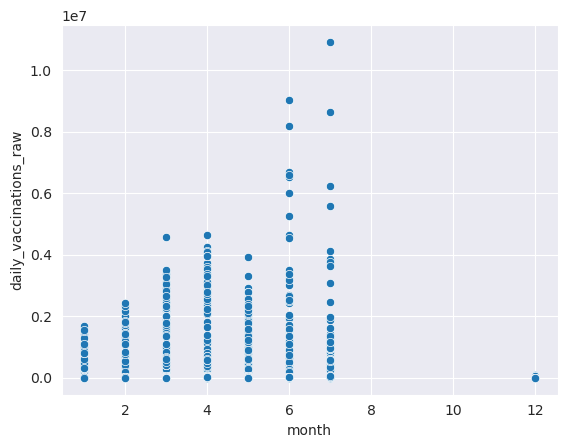

In [45]:
sns.scatterplot(data=df, x=df.month, y=df.daily_vaccinations_raw)

<Axes: xlabel='month', ylabel='daily_vaccinations_raw'>

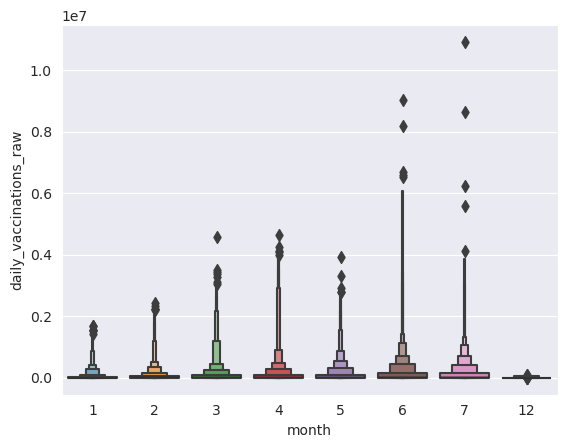

In [46]:
sns.boxenplot(data=df, x=df.month, y=df.daily_vaccinations_raw)

In [47]:
outliers = df.daily_vaccinations_raw.nlargest(4).values
outliers

array([10920459.,  9027343.,  8628796.,  8179856.])

In [48]:
# Remove outlier data
for out in outliers:
    df = df[df['daily_vaccinations_raw'] != out]

<Axes: xlabel='month', ylabel='people_vaccinated_per_hundred'>

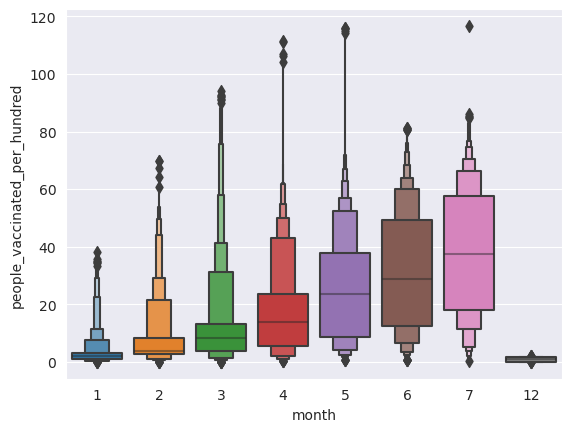

In [49]:
sns.boxenplot(data=df, x=df.month, y=df.people_vaccinated_per_hundred)

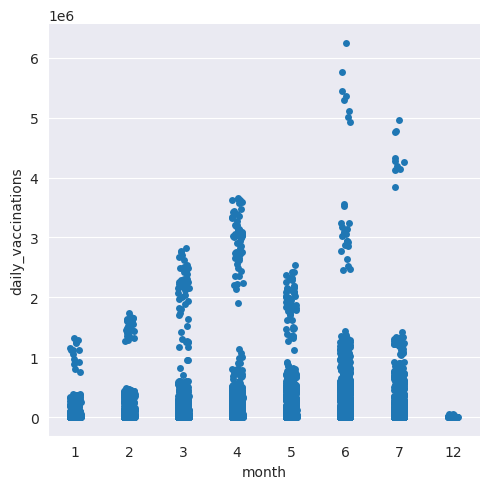

In [50]:
sns.catplot(data=df, x=df.month, y=df.daily_vaccinations)

In [51]:
# Remove outlier data
df = df[df['month'] != 12]

<Axes: xlabel='month', ylabel='total_vaccinations'>

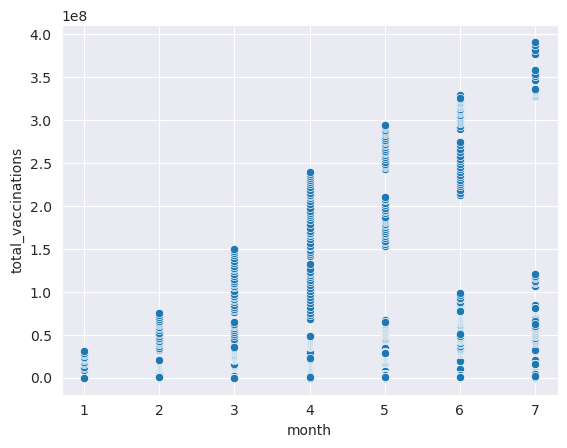

In [52]:
sns.scatterplot(data=df, x=df.month, y=df.total_vaccinations)

In [53]:
# Divide the data into x and y
y = df["total_vaccinations"]
X = df.drop("total_vaccinations", axis=1)

In [54]:
X

,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,day,month,...,country_Uruguay,country_Uzbekistan,country_Vanuatu,country_Venezuela,country_Vietnam,country_Wales,country_Wallis and Futuna,country_Yemen,country_Zambia,country_Zimbabwe
94,479574.0,113739.0,2859.0,6487.0,1.52,1.23,0.29,167.0,27,5,...,0,0,0,0,0,0,0,0,0,0
101,481800.0,148505.0,4015.0,5285.0,1.62,1.24,0.38,136.0,3,6,...,0,0,0,0,0,0,0,0,0,0
182,2438.0,611.0,1348.0,254.0,0.11,0.08,0.02,88.0,18,2,...,0,0,0,0,0,0,0,0,0,0
264,440921.0,181586.0,9548.0,12160.0,21.63,15.32,6.31,4225.0,11,5,...,0,0,0,0,0,0,0,0,0,0
265,444755.0,187921.0,10169.0,10870.0,21.98,15.45,6.53,3777.0,12,5,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31233,875182.0,588883.0,30487.0,15907.0,9.85,5.89,3.96,1070.0,9,7,...,0,0,0,0,0,0,0,0,0,1
31236,926312.0,605556.0,40471.0,23205.0,10.31,6.23,4.07,1561.0,12,7,...,0,0,0,0,0,0,0,0,0,1
31237,955656.0,619883.0,43671.0,27567.0,10.60,6.43,4.17,1855.0,13,7,...,0,0,0,0,0,0,0,0,0,1
31238,988746.0,624894.0,38101.0,30698.0,10.86,6.65,4.20,2065.0,14,7,...,0,0,0,0,0,0,0,0,0,1


In [55]:
X.values

array([[4.795740e+05, 1.137390e+05, 2.859000e+03, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [4.818000e+05, 1.485050e+05, 4.015000e+03, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [2.438000e+03, 6.110000e+02, 1.348000e+03, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       ...,
       [9.556560e+05, 6.198830e+05, 4.367100e+04, ..., 0.000000e+00,
        0.000000e+00, 1.000000e+00],
       [9.887460e+05, 6.248940e+05, 3.810100e+04, ..., 0.000000e+00,
        0.000000e+00, 1.000000e+00],
       [1.036252e+06, 6.306100e+05, 5.322200e+04, ..., 0.000000e+00,
        0.000000e+00, 1.000000e+00]])

In [56]:
# Feauter scalinig
scaler = StandardScaler()
X = scaler.fit_transform(X)

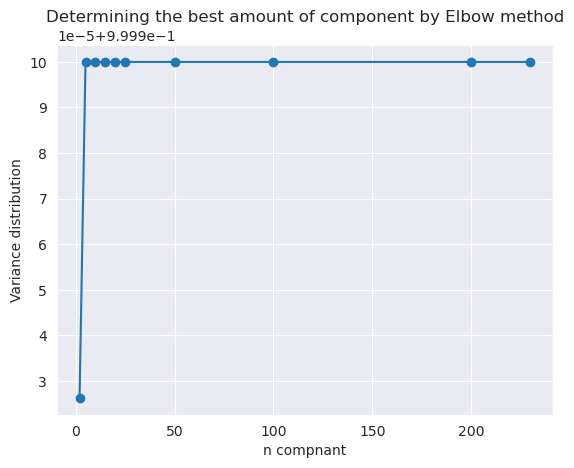

In [57]:
# Apply PCA with different values
n_components = [2, 5, 10, 15, 20, 25, 50, 100,200, 230]
explained_variances = []

for n in n_components:
    pca = PCA(n_components=n)
    pca.fit(df)
    explained_variances.append(sum(pca.explained_variance_ratio_))

# plot Elbow
plt.plot(n_components, explained_variances, marker='o')
plt.xlabel('n compnant')
plt.ylabel('Variance distribution')
plt.title('Determining the best amount of component by Elbow method')
plt.show()


In [58]:
# Dimensionality reduction with PCA
pca = PCA(n_components=30)
X_pca = pca.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size = 0.3, random_state = 4)

In [59]:
X_train.shape

(8211, 30)

## Train your model

In [60]:
# Model defenition
model = models.Sequential()
model.add(layers.Dense(units=32, activation='relu'))
model.add(layers.Dense(units=32, activation='relu'))

# We set activation='linear' because we want to have continues predictions on output
model.add(layers.Dense(units=1, activation='linear'))  

# call Rsquare
r2 = RSquare()

# Model compile
model.compile(optimizer='adam', loss='mean_squared_error', metrics=[r2, 'mean_squared_error'])

# Train Model
model.fit(X_train, y_train, epochs=50, batch_size=32)

# Model evaluation
loss, r2_score, mse_score = model.evaluate(X_test, y_test)
print(f'Mean Squared Error on Test Data: {mse_score}')
print(f'R² Score on Test Data: {r2_score}')

Epoch 1/50


2024-01-23 09:49:14.794801: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-23 09:49:14.795254: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


257/257 [==============================] - 1s 1ms/step - loss: 1364955773272064.0000 - r_square: -0.1004 - mean_squared_error: 1364955773272064.0000
Epoch 2/50
257/257 [==============================] - 0s 925us/step - loss: 1364933627346944.0000 - r_square: -0.1004 - mean_squared_error: 1364933627346944.0000
Epoch 3/50
257/257 [==============================] - 0s 906us/step - loss: 1364850680791040.0000 - r_square: -0.1003 - mean_squared_error: 1364850680791040.0000
Epoch 4/50
257/257 [==============================] - 0s 896us/step - loss: 1364678747881472.0000 - r_square: -0.1002 - mean_squared_error: 1364678747881472.0000
Epoch 5/50
257/257 [==============================] - 0s 968us/step - loss: 1364387092758528.0000 - r_square: -0.1000 - mean_squared_error: 1364387092758528.0000
Epoch 6/50
257/257 [==============================] - 0s 908us/step - loss: 1363958938206208.0000 - r_square: -0.0996 - mean_squared_error: 1363958938206208.0000
Epoch 7/50
257/257 [=====================

In [61]:
# Set the model parameter
svr = SVR(kernel='rbf')

# Train model
svr.fit(X_train, y_train)

# Prediction by train data
y_pred = svr.predict(X_train)

In [62]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: -0.07376058845612343
MAE: 10642002.586913966
MSE: 1331901338247787.8
RMSE: 36495223.499079816


In [64]:
# Set the model parameter
reg_mod = RandomForestRegressor(n_estimators=180, random_state=42)

# Train model
reg_mod.fit(X_train, y_train)

# Prediction by test data
y_pred = reg_mod.predict(X_test)

# Model Evaluation
print('R^2:',metrics.r2_score(y_test, y_pred))
print('MAE:',metrics.mean_absolute_error(y_test, y_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R^2: 0.9949230691967204
MAE: 456163.17879734846
MSE: 5313651463217.697
RMSE: 2305135.8882325566


In [65]:
# Fit XGBoost model
reg_mod = xgb.XGBRegressor()
reg_mod.fit(X_train, y_train)

# Get predictions
y_pred = reg_mod.predict(X_test)

In [66]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_test, y_pred))
print('MAE:',metrics.mean_absolute_error(y_test, y_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R^2: 0.9944434001771422
MAE: 641328.6004988237
MSE: 5815685878596.195
RMSE: 2411573.320178384


So, we know the best model for our data is XGBoost. Now we want to tune the hyperparameters by GridSearch

In [67]:
# Selection of several parameters to use in grid search
parameters_for_xgb = [{'n_estimators': [3000],
             'gamma': np.linspace(0, .5, 3, dtype="float"), 
             'learning_rate': np.linspace(.01, 1, 3, dtype="float"),
             "reg_lambda": np.linspace(0, 20, 3, dtype="int"),          
             }]

In [68]:
# Selecting parameters to perform GridSearchCV
grid_search_for_xgb = GridSearchCV(estimator = reg_mod,
                           param_grid = parameters_for_xgb,
                           scoring=['neg_mean_squared_error', 'r2'],
                           refit='neg_mean_squared_error',        
                           cv = 5,
                           n_jobs = -1)

In [69]:
# Train model
grid_search_for_xgb.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=-1,
             param_grid=[{'gamma': array([0.  , 0.25, 0.5 ]),
                          'learning_rate': array([0.01 , 0.505, 1.   ]),
                          'n_estimators': [3000],
                          'reg_lambda': array([ 0, 10, 20])}],
             refit='neg_mean_squared_error',
             scoring=['neg_mean_squared_error', 'r2'])

## Test the model and show the metrics

In [70]:
# Get the best hyperparameters and scores
best_score = grid_search_for_xgb.best_score_
best_parameters = grid_search_for_xgb.best_params_

In [71]:
# Prediction with test and training data
y_pred_train = grid_search_for_xgb.predict(X_train)
y_pred_test = grid_search_for_xgb.predict(X_test)

In [72]:
print(f"Best score for xgb model: {-best_score}")
print("Best score r2: ", grid_search_for_xgb.cv_results_["mean_test_r2"][grid_search_for_xgb.best_index_])
print(f"Best parameters for xgb model: {best_parameters}")

Best score for xgb model: 7273938571031.336
Best score r2:  0.9942985710563204
Best parameters for xgb model: {'gamma': 0.0, 'learning_rate': 0.01, 'n_estimators': 3000, 'reg_lambda': 10}


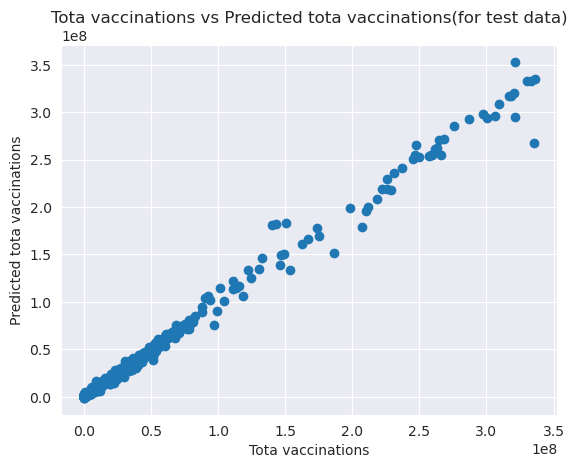

In [73]:
plt.scatter(y_test, y_pred_test)
plt.xlabel("Tota vaccinations")
plt.ylabel("Predicted tota vaccinations")
plt.title("Tota vaccinations vs Predicted tota vaccinations(for test data)")
plt.show()

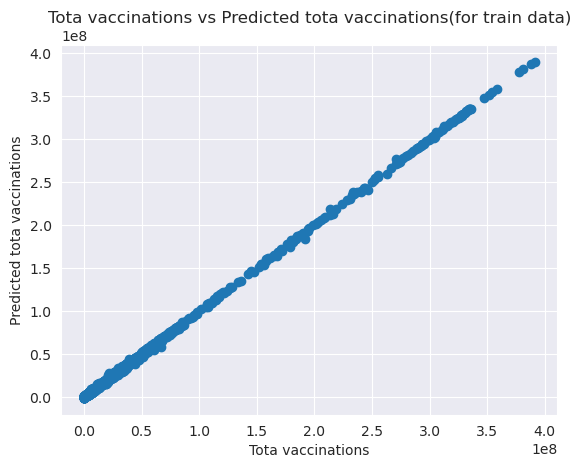

In [74]:
plt.scatter(y_train, y_pred_train)
plt.xlabel("Tota vaccinations")
plt.ylabel("Predicted tota vaccinations")
plt.title("Tota vaccinations vs Predicted tota vaccinations(for train data)")
plt.show()

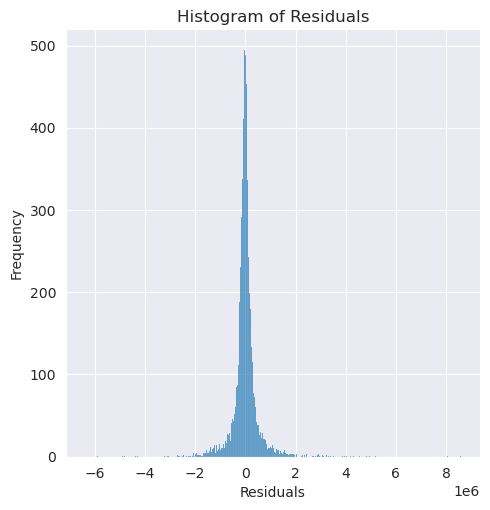

In [75]:
sns.displot(y_train-y_pred_train)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

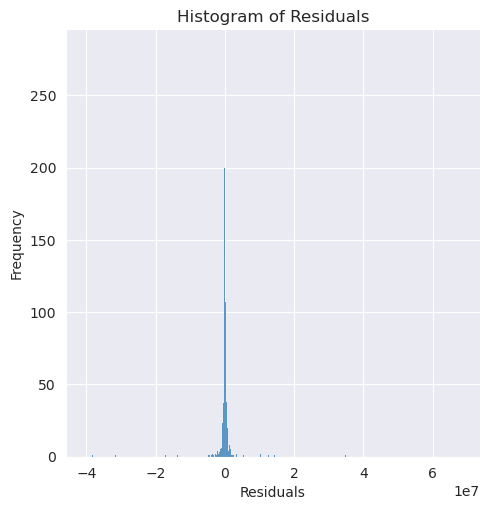

In [76]:
sns.displot(y_test-y_pred_test)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

## Save your final model

In [77]:
# Save final model
joblib.dump(grid_search_for_xgb, 'xgb_model.joblib')

['xgb_model.joblib']